This notebook shows an application of the gradient descent algorithm, to fit a linear regression model with 2 parameters (i.e. finding the slope and the intercept of the regression line to get the best estimation).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import display

%matplotlib inline

The data consists in a sample of 20 observations. For each individual, we have the age, the weight and the systolic pressure. Column "age" is removed from dataframe for simplicity

In [2]:
df=pd.read_csv("systolic_blood_press.csv")
del df['age']
display(df.head())
display(df.describe())
m = len(df) # number of observations

,systolic_press,weight
0,132,78
1,140,80
2,143,83
3,153,88
4,162,96


,systolic_press,weight
count,20.000000,20.00000
mean,146.350000,85.50000
std,14.925341,10.17996
min,124.000000,66.00000
25%,131.500000,79.50000
50%,146.500000,85.00000
75%,159.750000,92.50000
max,168.000000,104.00000


A scatter plot between weight and systolic pressure shows a strong correlation. This can be modelized with a regression line (y= a + bx) where a and b are the parameters to find. The instruction <i>stats.linregress</i> finds the best regression line so that the SSR (sum of squared residuals) is the lowest possible.

Slope from scipy.stats: 1.35830370747
Intercept from scipy.stats: 30.2150330117


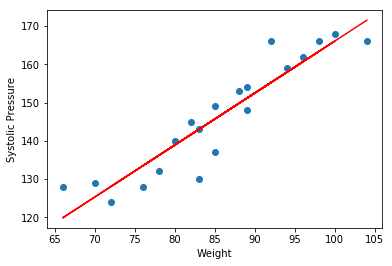

In [3]:
# Fit regression model
plt.scatter(x=df.weight, y=df.systolic_press)
res=stats.linregress(df.weight, df.systolic_press)

# Plot the regression line
abline_values = [res.slope*i+res.intercept for i in df.weight]
plt.plot(df.weight, abline_values, color="red")
plt.xlabel("Weight")
plt.ylabel("Systolic Pressure")

# Values found by scipy.stats
print("Slope from scipy.stats:", res.slope)
print("Intercept from scipy.stats:", res.intercept)

The more the line fits, the less SSR is, and vice versa. This can be expressed as a cost function. This last a and b parameters correspond to intercept and slope respectively, and outputs the corresponding SSR. This function has a minimum SSR corresponding to the best parameter estimate

In [4]:
def cost_function(a,b):
    error_squared=0
    # iterate through the sample and sum the squares of the distance between each point to the regression line
    for row in df.itertuples():
        index, systolic_press, weight = row
        estimated_y=a + b*weight
        error_squared += np.square(systolic_press-estimated_y)
    return error_squared/len(df)

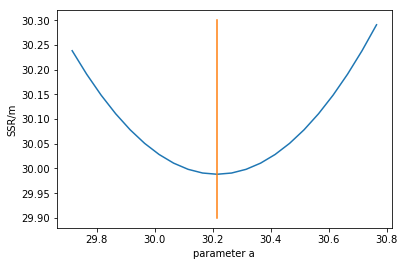

In [5]:
# Visualize the cost function for parameter a (intercept)
cost_x = np.arange(res.intercept-0.5, res.intercept+0.55, 0.05)
cost_y = [cost_function(i, res.slope) for i in cost_x]

plt.plot(cost_x, cost_y)
plt.plot([res.intercept, res.intercept], [29.9, 30.30])
plt.xlabel("parameter a")
plt.ylabel("SSR/m")

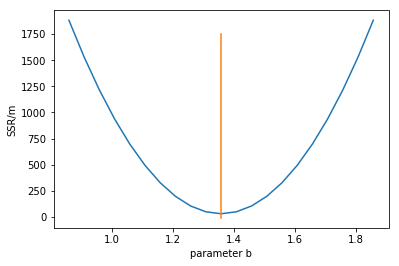

In [6]:
# Visualize the cost function for parameter b (slope)
cost_x = np.arange(res.slope-0.5, res.slope+0.55, 0.05)
cost_y = [cost_function(res.intercept, i) for i in cost_x]

plt.plot(cost_x, cost_y)
plt.plot([res.slope, res.slope], [-10, 1750])
plt.xlabel("parameter b")
plt.ylabel("SSR/m")

All the point of gradient descent is to find these minimums. Because the cost function is convex, it has a unique minimum which is local and global. Thus, one could use its derivative to find its minimum. Gradient descent starts with an initial guess and improves it at each iteration, so that it tends to the value minimizing the cost function. While approaching the minimum, the slope of the cost function tends to null, and gradients become smaller and smaller (convergence).
The example below suffers from high iterations and low learning rates. The following example resolves this issue by scaling the weight in a [0,1] range

In [7]:
def gradient_descent_iter(a,b):
    m=len(df)
    max_iteration = 5000 # very high number of iteration required to converge!
    iter = 0
    while True:
        iter += 1
        # at each gradient, it iterates through the entire sample (function sum below)
        # Note that for the derivative of the intercept a, we do not multiply by the weight, because the partial
        # derivative of a+b*weight with respect to a is 1, while in respect to b it would be weight
        deriva = sum([(a + b*df.weight[i] - df.systolic_press[i]) for i in range(m)]) / m
        derivb = sum([(a + b*df.weight[i] - df.systolic_press[i])*df.weight[i] for i in range(m)]) / m
        
        # While estimating these values separately, it converges very quickly, but together much more iterations
        # are required. The parameters influence each other. Note the different learning rates (0.3 and 0.0001)
        a = a - (0.3*deriva) 
        b = b - (0.0001*derivb)
        if (iter > max_iteration):
            return [a,b]

In [8]:
a,b = gradient_descent_iter(0, 0)
print("Found by gradient descent:", a,b)
print("From scipy:", res.intercept, res.slope)

Found by gradient descent: 30.2150408598 1.35830361655
From scipy: 30.2150330117 1.35830370747


Let's normalize the weight and see if it helps. The normalized y value "norm_df.systolic_press" must not be used, to keep predictions correct. It has been scaled here for demonstration

In [9]:
norm_df = (df-df.min())/(df.max()-df.min())
display(norm_df)

,systolic_press,weight
0,0.181818,0.315789
1,0.363636,0.368421
2,0.431818,0.447368
3,0.659091,0.578947
4,0.863636,0.789474
5,0.681818,0.605263
6,1.000000,0.894737
7,0.295455,0.500000
8,0.568182,0.500000
9,0.795455,0.736842


Slope from scipy.stats: 51.6155408837
Intercept from scipy.stats: 119.863077704


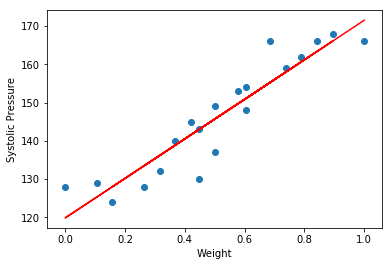

In [10]:
# Fit regression model with scaled weight
plt.scatter(x=norm_df.weight, y=df.systolic_press)
res=stats.linregress(norm_df.weight, df.systolic_press)

# Plot the regression line
abline_values = [res.slope*i+res.intercept for i in norm_df.weight]
plt.plot(norm_df.weight, abline_values, color="red")
plt.xlabel("Weight")
plt.ylabel("Systolic Pressure")

# Values found by scipy.stats
print("Slope from scipy.stats:", res.slope)
print("Intercept from scipy.stats:", res.intercept)

In this example, the gradient descent is applied on a scaled weight. As a result, only 200 iterations are required, with a common learning rate of 1.5 for both a and b.

In [11]:
def gradient_descent_normalized(a,b):
    m=len(df)
    max_iteration = 200 # much better, after scaling the weight in a [0,1] range
    alpha = 1.5
    iter = 0
    while True:
        iter += 1
        # Note that for the derivative of the intercept a, we do not multiply by the weight, because the partial
        # derivative of a+b*weight with respect to a is 1, while in respect to b it would be weight
        deriva = sum([(a + b*norm_df.weight[i] - df.systolic_press[i]) for i in range(m)]) / m
        derivb = sum([(a + b*norm_df.weight[i] - df.systolic_press[i])*norm_df.weight[i] for i in range(m)]) / m
        
        # now we case use a large learning rate alpha for both parameters
        a = a - (alpha*deriva) 
        b = b - (alpha*derivb)
        if (iter > max_iteration):
            return [a,b]

In [12]:
a,b = gradient_descent_normalized(0, 0)
print("Found by gradient descent:", a,b)
print("From scipy:", res.intercept, res.slope)

Found by gradient descent: 119.863080709 51.6155432137
From scipy: 119.863077704 51.6155408837
